In [178]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('TEST.csv')

In [179]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [180]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','percentageofarea','yielda','darea','areayieldrataio','rainfallaverage'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [181]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [182]:
# Remove the rows with zero values from the training set and testing set
mask =y['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [183]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [184]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [185]:

X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [186]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dctrice  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   fgprice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [187]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [188]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [189]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_train['windspeed'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [190]:
# # Remove the rows with zero values from the training set and testing set
# mask =y_train['dctrice'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [191]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [192]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [193]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [194]:
# mask = X_train['windspeed'] != 0


In [195]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [196]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [197]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_val['windspeed'] != 0

# # Apply the mask to X_train
# X_val = X_val[mask]

# # Apply the mask to y_train
# y_val = y_val[mask]

In [198]:
X_val.shape

(1540, 7)

In [199]:



from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=10, 
    max_leaf_nodes=100,
    random_state=42,
   
)

model.fit(X_train, y_train)


predictions = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f'\nMean Absolute Error (Test): {mae}')



r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

predictionsVal = model.predict(X_val)

# Evaluate the model

maev = mean_absolute_error(y_val, predictionsVal)
print(f'\nMean Absolute Error (Validation): {maev}')


r2 = model.score(X_val, y_val)
print(f'R-squared (Validation): {r2}')



C:\Users\Asus\AppData\Local\Temp\ipykernel_4008\665326855.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)



Mean Absolute Error (Test): 5563873.847527958
R-squared (Test): 0.8790094239478671

Mean Absolute Error (Validation): 5653572.772116059
R-squared (Validation): 0.8673496492829808


In [200]:
print(['{:.2f}'.format(pred) for pred in predictions])

['707555.11', '17835402.43', '3172153.61', '4411674.60', '3099656.50', '5689952.46', '3172153.61', '707555.11', '19021311.39', '2619653.97', '707555.11', '707555.11', '25152993.29', '2391476.64', '19200584.70', '6630115.46', '2872922.90', '4970644.80', '37744019.95', '14661375.61', '707555.11', '3157406.87', '1989621.51', '1130176.68', '41518076.90', '20796741.80', '4937339.38', '1288624.07', '5477627.99', '707555.11', '13003346.56', '707555.11', '11383322.08', '707555.11', '2931689.02', '707555.11', '13353826.27', '1288624.07', '7764508.05', '53145404.71', '3099656.50', '6643213.39', '707555.11', '13276085.36', '5480236.89', '8398265.06', '7751476.95', '707555.11', '1353732.54', '8254647.14', '10857154.96', '1795155.42', '4716488.90', '18607852.34', '7282886.10', '8144156.48', '15782937.00', '4858250.56', '2225851.78', '2280813.65', '24907477.97', '707555.11', '19400736.71', '3099656.50', '2473013.04', '8250435.79', '5689952.46', '27283554.02', '15031328.11', '13488202.97', '707555.11

In [201]:
# from sklearn.pipeline import make_pipeline
# from joblib import dump

# pipeline = make_pipeline(model)

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Save the pipeline
# dump(pipeline, 'RFR.joblib')

In [202]:

from sklearn.metrics import explained_variance_score


predictions = model.predict(X_test)

# Evaluate the model
r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = model.predict(X_val)

# Evaluate the model


r2 = model.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.8790094239478671
Mean Absolute Error (Test): 5563873.847527958

R-squared (Validation): 0.8673496492829808
Mean Absolute Error (Validation): 5653572.772116059

Explained Variance (Test): 0.879025975001053
Explained Variance (Validation): 0.8673700727781866

Mean Absolute Error (Test, p.p.): 37.861689846992576%
Mean Absolute Error (Validation, p.p.): 38.448548684238624%


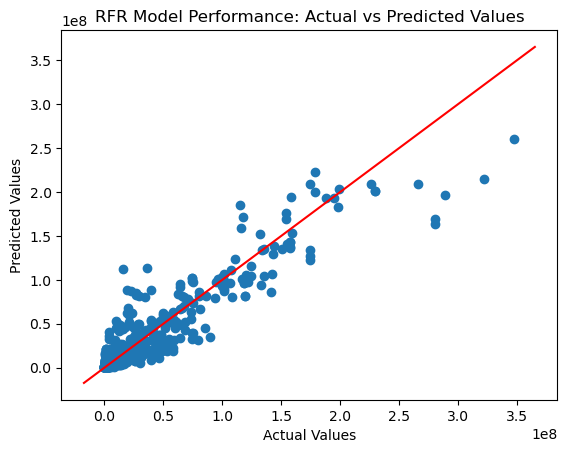

In [203]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')


# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

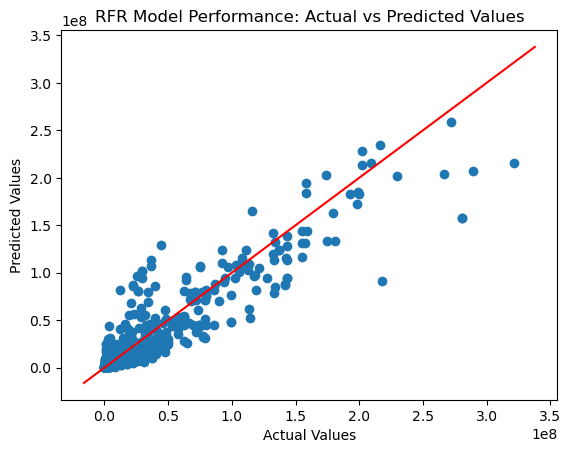

In [208]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = model.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Model Performance: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [211]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

         Actual    Predicted
0     738192.76    707555.11
1    8366137.44  17835402.43
2    1554548.52   3172153.61
3    1024538.36   4411674.60
4     571594.71   3099656.50
5    1006070.43   5689952.46
6    3373899.59   3172153.61
7      22651.45    707555.11
8   58069322.65  19021311.39
9     208189.28   2619653.97
10    282028.13    707555.11
11     87864.71    707555.11
12  28767680.15  25152993.29
13   1178074.71   2391476.64
14  30363474.74  19200584.70
15  13272386.18   6630115.46
16   7136440.98   2872922.90
17   2111223.37   4970644.80
18  48370619.70  37744019.95
19   6993733.89  14661375.61


In [206]:
# r2 = pipeline.score(X_test, y_test)
# print(f'R-squared (Test): {r2}')